In [8]:
from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp

In [9]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05 #0.05

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"

from dds.targets.toy_targets import get_attr
### SET TASK
task = "carillo"
div, e, other_dim = get_attr()
div = str(div).replace(".", "")
e = str(e).replace(".", "")

save_name = f"{task}_s{div}_plus{e}_od{other_dim}"


funnel_config = set_task(funnel_config, task)
funnel_config.model.reference_process_key = "oudstl"

# funnel_config.model.reference_process_key = "pisstl"
# funnel_config.model.step_scheme_key = "uniform"

# exp_dec
# cos_sq
# uniform
# last_small
# linear_dds
# linear
# uniform_dds

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 1.075
    funnel_config.model.alpha = 0.6875
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = False


# funnel_config.model.stl = False
# funnel_config.model.detach_stl_drift = False

funnel_config.model.stl = True
funnel_config.model.detach_stl_drift = True

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 11000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 5 * 10**(-3)
funnel_config.trainer.lr_sch_base_dec = 0.95 # For funnel

In [10]:
funnel_config.model.reference_process_key 

'oudstl'

In [11]:
input_dim = funnel_config.model.input_dim

In [12]:
funnel_config.model.step_scheme_key

'cos_sq'

In [13]:
funnel_config.model.ts.shape

(128,)

Best training loss: [0.00011349]


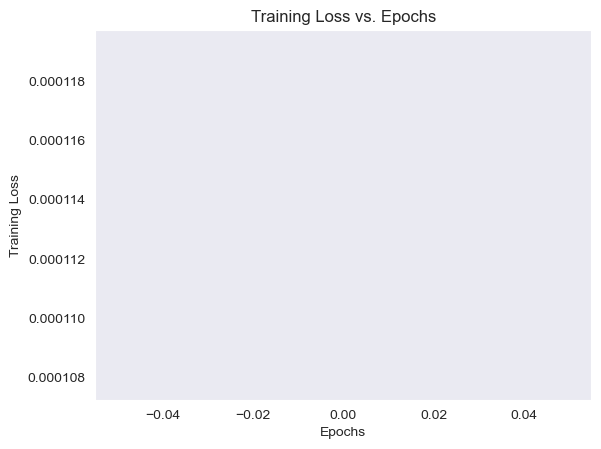

('epoch: %s %s  loss: %s', 0, 'TRAIN', -1.56489098072052)
('epoch: %s %s  loss: %s', 1, 'TRAIN', -1.5505753755569458)
('epoch: %s %s  loss: %s', 2, 'TRAIN', -1.5861619710922241)
('epoch: %s %s  loss: %s', 3, 'TRAIN', -1.6074802875518799)
('epoch: %s %s  loss: %s', 4, 'TRAIN', -1.62062406539917)
('epoch: %s %s  loss: %s', 5, 'TRAIN', -1.6828945875167847)
('epoch: %s %s  loss: %s', 6, 'TRAIN', -1.7372324466705322)
('epoch: %s %s  loss: %s', 7, 'TRAIN', -1.7769763469696045)
('epoch: %s %s  loss: %s', 8, 'TRAIN', -1.94015634059906)
('epoch: %s %s  loss: %s', 9, 'TRAIN', -2.158662796020508)
Best training loss: [1.335144e-05]


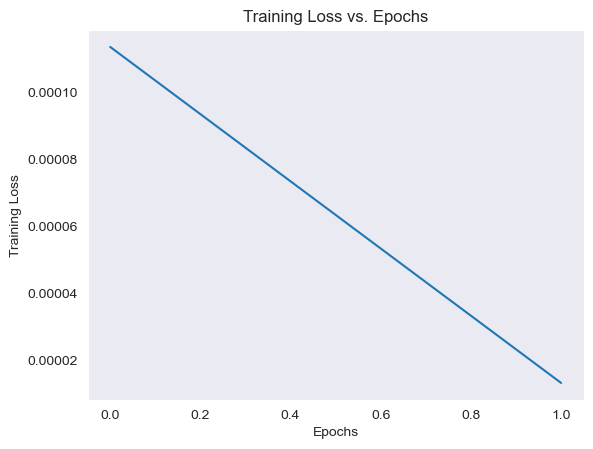

('epoch: %s %s  loss: %s', 10, 'TRAIN', -2.28243350982666)
('epoch: %s %s  loss: %s', 11, 'TRAIN', -2.343874931335449)
('epoch: %s %s  loss: %s', 12, 'TRAIN', -2.7771553993225098)
('epoch: %s %s  loss: %s', 13, 'TRAIN', -1.7682037353515625)
('epoch: %s %s  loss: %s', 14, 'TRAIN', -2.2122817039489746)
('epoch: %s %s  loss: %s', 15, 'TRAIN', -2.7197577953338623)
('epoch: %s %s  loss: %s', 16, 'TRAIN', -2.5290958881378174)
('epoch: %s %s  loss: %s', 17, 'TRAIN', -2.420480489730835)
('epoch: %s %s  loss: %s', 18, 'TRAIN', -2.3292438983917236)
('epoch: %s %s  loss: %s', 19, 'TRAIN', -2.322732925415039)
('epoch: %s %s  loss: %s', 0, 'TRAIN', -2.430939197540283)
('epoch: %s %s  loss: %s', 1, 'TRAIN', -2.3801748752593994)
('epoch: %s %s  loss: %s', 2, 'TRAIN', -2.5375936031341553)
('epoch: %s %s  loss: %s', 3, 'TRAIN', -2.303802490234375)
('epoch: %s %s  loss: %s', 4, 'TRAIN', -2.3120386600494385)
('epoch: %s %s  loss: %s', 5, 'TRAIN', -2.2944633960723877)
('epoch: %s %s  loss: %s', 6, 'TRAIN'

In [14]:
funnel_config.trainer.epochs = 20
out_dict = train_dds(funnel_config)

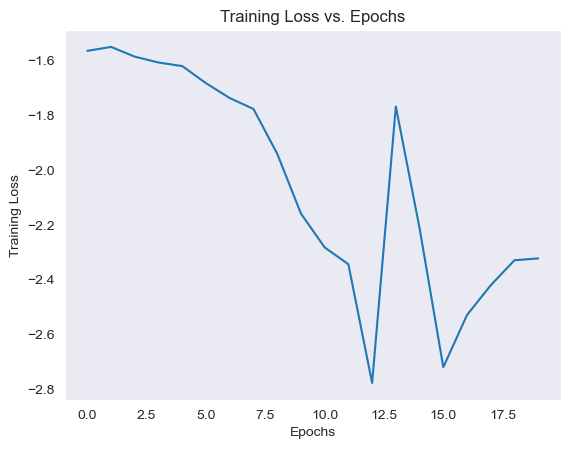

In [15]:
from utility_func import *
plot_training_loss(out_dict[-1]["elbo"])


In [16]:
out_dict[-1].keys()

dict_keys(['elbo', 'is', 'pf', 'elbo_eval', 'is_eval', 'pf_eval', 'aug', 'aug_ode', 'aug_ode_ext'])

In [17]:
onp.mean(out_dict[-1]["is_eval"])

-3.179955514272054

In [18]:
onp.mean(out_dict[-1]["pf_eval"])

-11.266405137379964

In [19]:
out_dict[-1]["pf_eval"]

[-9.648384094238281,
 -9.636154174804688,
 -13.846702575683594,
 -8.768342971801758,
 -11.581710815429688,
 -11.744279861450195,
 -9.874238967895508,
 -12.70344352722168,
 -9.243997573852539,
 -8.67204475402832,
 -10.057327270507812,
 -16.847959518432617,
 -10.163301467895508,
 -18.59588623046875,
 -8.240161895751953,
 -9.336999893188477,
 -9.419378280639648,
 -13.329496383666992,
 -7.371835708618164,
 -9.967483520507812,
 -12.987115859985352,
 -9.637615203857422,
 -8.279112815856934,
 -11.163318634033203,
 -16.867942810058594,
 -10.616514205932617,
 -13.024089813232422,
 -15.451026916503906,
 -10.06167984008789,
 -10.854608535766602]

In [20]:
funnel_config.model.reference_process_key

'oudstl'

In [21]:
print(out_dict[-1]["aug"].shape)

(5000, 129, 4)


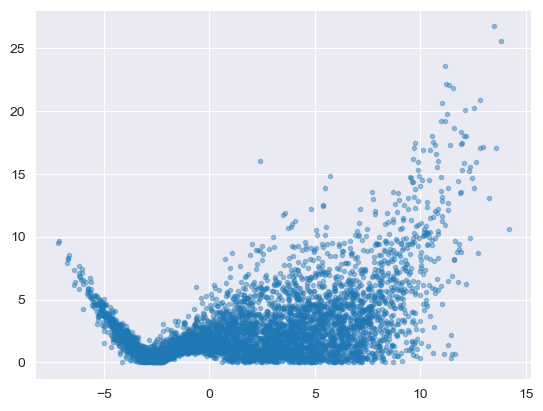

In [22]:
import matplotlib.pyplot as plt

#ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

#plt.plot(ode_targ[:, 0], abs(ode_targ[:, 1]), ".", alpha=0.4)
plt.plot(sde_targ[:, 0], abs(sde_targ[:, 1]), ".", alpha=0.4)
#print(onp.mean(sde_targ[:, 0]))

In [23]:
import numpy as np
data_x = []
data_fx = []
for sample in out_dict[-1]["aug"]:
    x = sample[-1][:input_dim-1]
    fx = abs(sample[-1][input_dim-1])
    data_x.append(x)
    data_fx.append(fx)

m = np.argmax(data_fx)
print(f"weights: {data_x[m]}")


# Create a list of tuples containing x, y, and z values
combined_data = zip(data_x, data_fx)

# Sort the combined data based on the z values in descending order
sorted_data = sorted(combined_data, key=lambda t: t[1], reverse=True)

# Unzip the sorted data back into separate x, y, and z lists
data_x_sorted, data_fx_sorted = zip(*sorted_data)

best = np.array(list(zip(data_x_sorted, data_fx_sorted)))[:100]
# avg = np.mean(best, axis=0)
# v, w = avg
# print(np.sin(3*np.pi*v) + (v - 1)**2 * (1+np.sin(3*np.pi*w)**2) + (w-1)**2 * (1 + np.sin(2*np.pi*w)**2))
# print(avg)
#print(best)
# for v,w in best:
#     v = np.sin(3*np.pi*v) + (v - 1)**2 * (1+np.sin(3*np.pi*w)**2) + (w-1)**2 * (1 + np.sin(2*np.pi*w)**2)
#     print(v)
from experimental.xor_t import xor_task
task = xor_task()
b = 1
w = None
print(len(data_x))
for weights in data_x:
#for weights, _ in best:
    l = task.get_loss(weights)
    #print(l)
    if l < b:
        b = l
        w = weights

print(b, w)



weights: []
5000


/var/folders/hj/s1tsphl91cz5pf6ngrvwd75w0000gn/T/ipykernel_79836/2052438146.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  best = np.array(list(zip(data_x_sorted, data_fx_sorted)))[:100]


ValueError: not enough values to unpack (expected 6, got 0)

In [ ]:
from visualisation import *

heat_2d(out_dict, save_name=save_name, sde=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = []
for sample in out_dict[-1]["aug"]:
    s = sample[-1][0]
    data.append(s)

# Compute the histogram values
hist, bin_edges = np.histogram(data, bins=50)

# Compute the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create a line plot using Seaborn
sns.lineplot(x=bin_centers, y=hist)

# Set the x and y axis labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()